In [1]:
#import dependencies
import pandas as pd
import numpy as np
from pathlib import Path
from collections import Counter
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
import seaborn as sns
#import the file from github to a dataframe
url = "https://raw.githubusercontent.com/Bropell/Asthma_Analysis_in_California_Counties/Re_Do/Databases/Merged_Datasets2.csv"
ap_df = pd.read_csv(url)

ap_df = ap_df.set_index("County")

In [2]:
# rename total clean energy column
ap_df = ap_df.rename(columns={'Total': 'Total Clean Energy (GW)'})
ap_df

,"Pollutant: 1,3-butadiene",Pollutant: Acetaldehyde,Pollutant: Benzene,Pollutant: Carbon tetrachloride,Pollutant: Formaldehyde,Target,Income,IncomePerCap,Poverty,ChildPoverty,...,Public EV Chargers,AcresBurned,Registered EV Count,Biomass,Small Hydro,Geothermal,Solar Thermal,Solar Photovoltaic,Wind,Total Clean Energy (GW)
County,,,,,,,,,,,,,,,,,,,,,
Alameda,0.07,1.20,0.66,0.55,1.33,1,32912042,15213192,4288.1,4775.2,...,66,6387,45785,116,0,0,0,29,764,909
Alpine,0.01,0.99,0.07,0.55,0.76,1,63438,27448,19.8,17.3,...,3,0,11,0,0,0,0,0,0,0
Amador,0.02,1.85,0.22,0.55,1.89,1,557620,269813,97.0,161.6,...,8,6285,226,0,78,0,0,2,0,80
Butte,0.05,2.28,0.48,0.55,2.34,1,2453092,1310594,1088.6,1125.1,...,8,190702,982,3,225,0,0,16,0,244
Calaveras,0.02,1.76,0.21,0.55,1.77,1,540543,358794,127.5,175.2,...,3,2648,276,0,202,0,0,3,0,205
Colusa,0.01,1.85,0.25,0.55,1.72,0,280707,130678,70.7,108.2,...,1,459316,45,188,0,0,0,0,0,188
Contra Costa,0.06,1.24,0.58,0.55,1.38,1,20351592,9092551,1992.7,2369.6,...,31,6884,25938,31,0,0,0,83,88,201
Del Norte,0.01,1.07,0.29,0.55,0.89,0,273636,138463,184.8,270.5,...,3,38407,92,0,0,0,0,0,0,0
El Dorado,0.03,1.89,0.30,0.55,1.90,1,3321762,1573240,424.9,517.3,...,27,114411,2795,0,190,0,0,0,0,190


In [3]:
ap_df['Target'].replace({0: "t", 1: "f"}, inplace=True)

In [4]:
ap_df

,"Pollutant: 1,3-butadiene",Pollutant: Acetaldehyde,Pollutant: Benzene,Pollutant: Carbon tetrachloride,Pollutant: Formaldehyde,Target,Income,IncomePerCap,Poverty,ChildPoverty,...,Public EV Chargers,AcresBurned,Registered EV Count,Biomass,Small Hydro,Geothermal,Solar Thermal,Solar Photovoltaic,Wind,Total Clean Energy (GW)
County,,,,,,,,,,,,,,,,,,,,,
Alameda,0.07,1.20,0.66,0.55,1.33,f,32912042,15213192,4288.1,4775.2,...,66,6387,45785,116,0,0,0,29,764,909
Alpine,0.01,0.99,0.07,0.55,0.76,f,63438,27448,19.8,17.3,...,3,0,11,0,0,0,0,0,0,0
Amador,0.02,1.85,0.22,0.55,1.89,f,557620,269813,97.0,161.6,...,8,6285,226,0,78,0,0,2,0,80
Butte,0.05,2.28,0.48,0.55,2.34,f,2453092,1310594,1088.6,1125.1,...,8,190702,982,3,225,0,0,16,0,244
Calaveras,0.02,1.76,0.21,0.55,1.77,f,540543,358794,127.5,175.2,...,3,2648,276,0,202,0,0,3,0,205
Colusa,0.01,1.85,0.25,0.55,1.72,t,280707,130678,70.7,108.2,...,1,459316,45,188,0,0,0,0,0,188
Contra Costa,0.06,1.24,0.58,0.55,1.38,f,20351592,9092551,1992.7,2369.6,...,31,6884,25938,31,0,0,0,83,88,201
Del Norte,0.01,1.07,0.29,0.55,0.89,t,273636,138463,184.8,270.5,...,3,38407,92,0,0,0,0,0,0,0
El Dorado,0.03,1.89,0.30,0.55,1.90,f,3321762,1573240,424.9,517.3,...,27,114411,2795,0,190,0,0,0,0,190


In [5]:
X = pd.get_dummies(ap_df)

In [6]:
X.columns

Index(['Pollutant: 1,3-butadiene', 'Pollutant: Acetaldehyde',
       'Pollutant: Benzene', 'Pollutant: Carbon tetrachloride',
       'Pollutant: Formaldehyde', 'Income', 'IncomePerCap', 'Poverty',
       'ChildPoverty', 'Construction', 'Drive', 'Carpool', 'Transit',
       'Hispanic (%)', 'White (%)', 'Black (%)', 'Native (%)', 'Asian (%)',
       'Pacific (%)', 'Max_Voltage', 'Total EV Chargers',
       'Private EV Chargers', 'Public EV Chargers', 'AcresBurned',
       'Registered EV Count', 'Biomass', 'Small Hydro', 'Geothermal',
       'Solar Thermal', 'Solar Photovoltaic ', 'Wind',
       'Total Clean Energy (GW)', 'Target_f', 'Target_t'],
      dtype='object')

In [7]:
# Create our features
X = pd.get_dummies(ap_df)
X = X.drop(columns=["Target_t","Target_f"])

# Create our target
y = pd.get_dummies(ap_df)
y = y["Target_t"]


In [8]:
#train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
# fit the model and create prediction array
from imblearn.ensemble import BalancedRandomForestClassifier
brfc = BalancedRandomForestClassifier(random_state=1)
brfc = brfc.fit(X_train,y_train)
predictions = brfc.predict(X_test)
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1], dtype=uint8)

In [10]:
# Balanced Accuracy Score 
y_pred = predictions
print("Balanced Accuracy Score")
balanced_accuracy_score(y_test,y_pred)

Balanced Accuracy Score


0.3611111111111111

In [11]:
# Confusion Matrix
print("Confusion Matrix")
confusion_matrix(y_test, y_pred)

Confusion Matrix


array([[3, 3],
       [7, 2]])

In [12]:
# Print the imbalanced classification report
print("Classification Report")
print(classification_report_imbalanced(y_test, y_pred))

Classification Report
                   pre       rec       spe        f1       geo       iba       sup

          0       0.30      0.50      0.22      0.37      0.33      0.11         6
          1       0.40      0.22      0.50      0.29      0.33      0.11         9

avg / total       0.36      0.33      0.39      0.32      0.33      0.11        15



In [13]:
# Calculate the feature importance
importances = brfc.feature_importances_
importances

array([0.01396239, 0.03865052, 0.03178294, 0.        , 0.04362131,
       0.01948385, 0.04860467, 0.01818258, 0.01976293, 0.02479498,
       0.02018852, 0.0317943 , 0.06388832, 0.03288967, 0.04239742,
       0.03911882, 0.06455452, 0.02333999, 0.03698725, 0.03990654,
       0.03924236, 0.0080966 , 0.0287888 , 0.02886888, 0.03952829,
       0.01871173, 0.0191096 , 0.00839217, 0.00093827, 0.03933457,
       0.03797546, 0.07710177])

In [14]:
# Sort features by their importance
features_rank = sorted(zip(brfc.feature_importances_, X.columns), reverse=True)

In [15]:
# Turn importance of features into a dataframe
features_df = pd.DataFrame(features_rank)
cols = ['Importance', 'Feature']
features_df.columns = cols
features_df

,Importance,Feature
0,0.077102,Total Clean Energy (GW)
1,0.064555,Native (%)
2,0.063888,Transit
3,0.048605,IncomePerCap
4,0.043621,Pollutant: Formaldehyde
5,0.042397,White (%)
6,0.039907,Max_Voltage
7,0.039528,Registered EV Count
8,0.039335,Solar Photovoltaic
9,0.039242,Total EV Chargers


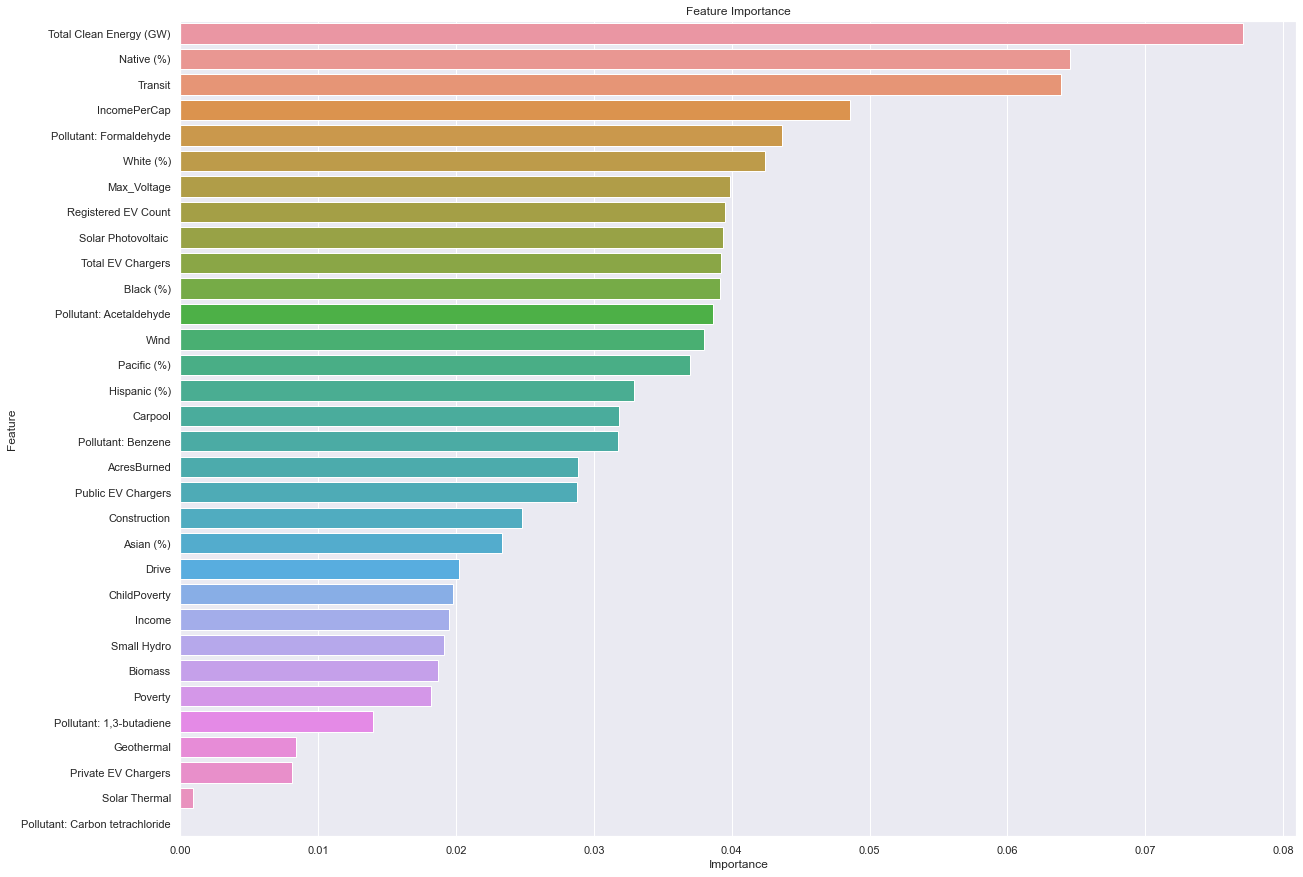

In [17]:
# Create visualization of feature importance
chart = sns.barplot(data=features_df, x="Importance", y="Feature", orient='h').set(title='Feature Importance')
sns.set(rc={'figure.figsize':(20,10)})